# TensorFlow ANN for seasonal selections

###### Load modules 

The following conditions apply:

 - env = tensor_flow_38


In [47]:


%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split


# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle5 as Pickle



ModuleNotFoundError: No module named 'statsmodels'

In [93]:
# importing the libraries
import os
from glob import glob
from keras.models import Sequential
# from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [48]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
date_str = now.strftime("%Y%m%d")
date_time_str = now.strftime("%Y%m%d_%H%M%S")
print(date_str)
print(date_time_str)

20230203
20230203_100631


### Import data

In [49]:
#date_str = "20230201"
drive = "F"
data_date = "20230201"
# define output directory
output_dir = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date_str)
export_dir = os.path.join(output_dir, date_time_str)

# data dir
dir_ = r"{0}:\cdu\data\zonal_stats\output\{1}\ml_data_si_dir".format(drive, data_date)

index_ = 0


In [50]:
def mk_dir_fn(dir_):
    """ Create a new directory if one does not already exist. """
    if not os.path.isdir(dir_):
        os.mkdir(dir_)

        
def export_csv_fn(list_, dir_, file_name):
    
    """ Create and export path from directory and file name and exports csv with no dropping the index column. """
    
    df_final = pd.concat(list_, axis =0)    
    output_path = os.path.join(dir_, file_name)
    df_final.to_csv(os.path.join(output_path), index=False)
    print("File output to: ", output_path)
    
    return df_final

## Set output file locations

## Load data

In [51]:
file_list = []
for f in glob(os.path.join(dir_, "*class.csv")):
    print(f)
    file_list.append(f)


F:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\season_NO_climate_fillna_mean_fms_NOT_si_class.csv
F:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\r2_best_season_NO_climate_fillna_fms_NOT_si_class.csv


In [52]:
_, file_name = os.path.split(file_list[index_])
split_list = file_name.split(".")
data_set = split_list[0]

In [53]:
data_set

'season_NO_climate_fillna_mean_fms_NOT_si_class'

In [54]:
ml_rf_reg_dir= os.path.join(output_dir, "ml_ann_dir")
data_set_dir= os.path.join(ml_rf_reg_dir, data_set)
export_ml_rf_reg_dir = os.path.join(data_set_dir, date_time_str)
# plots_dir = os.path.join(export_ml_rf_reg_dir, data_set)
all_plots_dir = os.path.join(export_ml_rf_reg_dir, "all_plots")
# no_tern_plots_dir = os.path.join(plots_dir, "no_tern")
# mk_dir_fn(output_dir)
mk_dir_fn(ml_rf_reg_dir)
mk_dir_fn(data_set_dir)
mk_dir_fn(export_ml_rf_reg_dir)
# mk_dir_fn(plots_dir)
mk_dir_fn(all_plots_dir)
# mk_dir_fn(no_tern_plots_dir)

In [55]:
export_ml_rf_reg_dir

'F:\\cdu\\data\\zonal_stats\\output\\20230203\\ml_ann_dir\\season_NO_climate_fillna_mean_fms_NOT_si_class\\20230203_100631'

In [56]:
df = pd.read_csv(file_list[index_], header=0)

In [57]:
df

,target,site,uid,date,bio_agb_kg1ha,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,c0,nt001,119,20110523,0.00,13.78,47.00,25.85,23.87,8.48,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,c0,barkely01,42,20111025,0.00,0.75,2.87,1.69,1.49,0.70,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,c0,barkely02,43,20111026,0.00,2.12,13.78,4.97,4.73,2.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
3,c0,barkely04,45,20111026,0.00,2.12,6.42,4.37,4.47,1.22,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
4,c0,barkely03,44,20111026,0.00,0.75,3.29,1.82,1.64,0.70,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,c4,ntadac0002,5,20160506,20805.22,15.54,42.39,29.12,29.27,6.84,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,c5,ntaarp0001,1,20160602,30472.45,27.61,38.92,34.75,34.33,3.24,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,c4,ntaarp0002,2,20160602,24414.13,9.06,22.31,14.40,14.21,3.60,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,c3,ntaarp0003,3,20160603,17598.35,5.26,25.45,13.08,12.11,5.79,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


In [58]:
t_list = []
for i in df.target:
    x = int(i[1])
    t_list.append(x)
    
df["target"] = t_list    

In [59]:
df

,target,site,uid,date,bio_agb_kg1ha,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0,nt001,119,20110523,0.00,13.78,47.00,25.85,23.87,8.48,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0,barkely01,42,20111025,0.00,0.75,2.87,1.69,1.49,0.70,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0,barkely02,43,20111026,0.00,2.12,13.78,4.97,4.73,2.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
3,0,barkely04,45,20111026,0.00,2.12,6.42,4.37,4.47,1.22,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
4,0,barkely03,44,20111026,0.00,0.75,3.29,1.82,1.64,0.70,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,4,ntadac0002,5,20160506,20805.22,15.54,42.39,29.12,29.27,6.84,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,5,ntaarp0001,1,20160602,30472.45,27.61,38.92,34.75,34.33,3.24,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,4,ntaarp0002,2,20160602,24414.13,9.06,22.31,14.40,14.21,3.60,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,3,ntaarp0003,3,20160603,17598.35,5.26,25.45,13.08,12.11,5.79,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


In [61]:
df2 = df.copy(deep=True)

## Choose which data set to run the models from

In [75]:
df_ml = df2
# df_ml = df

In [76]:
print(list(df_ml.columns))

['target', 'site', 'uid', 'date', 'bio_agb_kg1ha', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1

In [77]:
# drop some of the unwanted values
df_ml.drop(['site', 'uid', 'date', 'bio_agb_kg1ha'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [78]:
print(list(df_ml))

['target', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1_0112_std', 'b1_dp1_0112_med', 'b2_dp1_0

In [79]:
df_ml.shape

(167, 159)

## Qty of 0 values dataset 

In [81]:
model_data = df_ml
model_data_name = "all_values"

# ## Filter out all taregt == 0 values
# model_data = df_ml[df_ml['target']>0.0]
# model_data_name = "no0_values"

# ## Select a randon number of 0 values
# n = 3
# agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# model_data_name = f"s{n}_0_values"


model_outputs = os.path.join(export_ml_rf_reg_dir, f"{model_data_name}")
mk_dir_fn(model_outputs)

print(model_outputs)

F:\cdu\data\zonal_stats\output\20230203\ml_ann_dir\season_NO_climate_fillna_mean_fms_NOT_si_class\20230203_100631\all_values


In [82]:
model_data.dropna(inplace=True)

 Define if you are using all variabes or selected variables

slope:  3.040645357909495
intersept:  1.9965922155827052
r2:  0.5016004444240335
P_value:  5.019415775598486e-12
std error:  0.40825536649356076


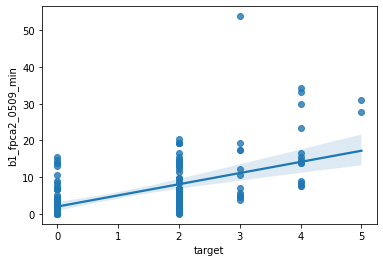

In [84]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b2_dbi_mean'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [102]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('int')
ydata1 = model_data[[value_x]].astype('int')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(116, 158) (116,)
(51, 158) (51,)


### Plot up Histograms of  train and test datasets

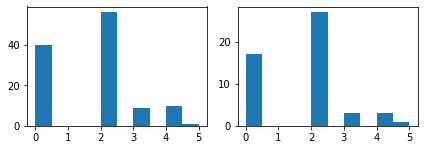

In [87]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [88]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [89]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [104]:


X = model_data.iloc[:, 1:].astype('int')
y = model_data[[value_x]].astype('int')

X_1, X_2, y_1, y_2

 
# X=CarPricesDataNumeric[Predictors].values
# y=CarPricesDataNumeric[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(116, 158)
(116, 1)
(51, 158)
(51, 1)


In [110]:
# # importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5)) #, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
6/6 [==============================] - 0s 3ms/step - loss: 0.9658
Epoch 2/50
6/6 [==============================] - 0s 0s/step - loss: 0.9529
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.9368
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 0.9148
Epoch 5/50
6/6 [==============================] - 0s 951us/step - loss: 0.8909
Epoch 6/50
6/6 [==============================] - 0s 1000us/step - loss: 0.8655
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 0.8372
Epoch 8/50
6/6 [==============================] - 0s 722us/step - loss: 0.8146
Epoch 9/50
6/6 [==============================] - 0s 960us/step - loss: 0.7903
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.7670
Epoch 11/50
6/6 [==============================] - 0s 712us/step - loss: 0.7467
Epoch 12/50
6/6 [==============================] - 0s 665us/step - loss: 0.7267
Epoch 13/50
6/6 [==============================] - 0s 996us/s

In [106]:
np.nan_to_num(X_1)

array([[      1,      15,       7, ..., 1985927, 3799551, 4918354],
       [      0,       3,       0, ..., 1426028, 2064682, 2330361],
       [     13,      27,      20, ..., 2842230, 5584112, 8785900],
       ...,
       [      3,      16,       7, ..., 2195376, 3468493, 4359946],
       [      2,      19,      13, ..., 1740024, 3440818, 4314890],
       [     19,      34,      25, ..., 3457565, 5987220, 9960151]])

In [113]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

pkl_out = os.path.join(model_outputs, f'ann_model_{str_model}')


with open(pkl_out, 'wb') as f:
    pickle.dump(rfrLCHM, f)

NameError: name 'str_model' is not defined

In [112]:
with open(pkl_out, 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))

r2 = round(rf.score(xdata2, ydata), 2)
mse = round(np.mean((ydata - rf.predict(xdata2))** 2), 2)
rmse = round(np.sqrt(np.mean((predicted - ydata) ** 2)), 2)
exp_var = round(explained_variance_score(ydata, predicted), 2)
bias = round(np.mean(ydata) - np.mean(predicted), 2)

# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$Var = {exp_var}$', fontsize = 12)
plt.text(300, 27000, f'$n = {len(y_1)}$', fontsize = 12)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')

plot_out = os.path.join(model_outputs, f'{str_model}_unseen_data.jpg')

fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

NameError: name 'pkl_out' is not defined

In [76]:
xdata2

,b1_h99a_01122_max,b2_dbi_0608_mean,b2_dbi_0608_med,b3_dbi_0608_max,b2_dp1_0112_std,b2_dbi_0608_min,b2_dbi_0608_max,b2_dp1_0509_std
7,5.20,1153.48,1144.00,1648.00,2.71,1081.00,1236.00,0.74
8,12.23,760.10,761.50,1380.00,5.25,583.00,870.00,2.85
9,12.23,1144.50,1135.00,1956.00,2.17,1088.00,1204.00,2.85
10,12.23,698.56,696.00,1126.00,7.79,667.00,742.00,2.85
12,12.23,890.55,874.00,1450.00,3.83,768.00,1037.00,2.85
...,...,...,...,...,...,...,...,...
162,20.42,430.12,417.00,585.00,3.14,396.00,485.00,1.89
163,21.59,447.75,449.00,682.00,2.18,387.00,494.00,2.05
164,16.81,628.84,616.00,1381.00,2.56,550.00,786.00,1.89
165,20.05,611.56,594.00,1105.00,5.80,526.00,717.00,6.61


In [75]:
xdata2 = df1[column_var].astype('float32')
xdata2.drop("target", axis=1, inplace=True)

ydata1 = df1[['target']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

110


In [74]:
df1

,target,b1_h99a_01122_max,b2_dbi_0608_mean,b2_dbi_0608_med,b3_dbi_0608_max,b2_dp1_0112_std,b2_dbi_0608_min,b2_dbi_0608_max,b2_dp1_0509_std
7,1894.20,5.20,1153.48,1144.00,1648.00,2.71,1081.00,1236.00,0.74
8,1536.15,12.23,760.10,761.50,1380.00,5.25,583.00,870.00,2.85
9,1164.24,12.23,1144.50,1135.00,1956.00,2.17,1088.00,1204.00,2.85
10,4736.01,12.23,698.56,696.00,1126.00,7.79,667.00,742.00,2.85
12,1549.09,12.23,890.55,874.00,1450.00,3.83,768.00,1037.00,2.85
...,...,...,...,...,...,...,...,...,...
162,20805.22,20.42,430.12,417.00,585.00,3.14,396.00,485.00,1.89
163,30472.45,21.59,447.75,449.00,682.00,2.18,387.00,494.00,2.05
164,24414.13,16.81,628.84,616.00,1381.00,2.56,550.00,786.00,1.89
165,17598.35,20.05,611.56,594.00,1105.00,5.80,526.00,717.00,6.61


In [73]:
df1[column_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 7 to 166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             110 non-null    float64
 1   b1_h99a_01122_max  110 non-null    float64
 2   b2_dbi_0608_mean   110 non-null    float64
 3   b2_dbi_0608_med    110 non-null    float64
 4   b3_dbi_0608_max    110 non-null    float64
 5   b2_dp1_0112_std    110 non-null    float64
 6   b2_dbi_0608_min    110 non-null    float64
 7   b2_dbi_0608_max    110 non-null    float64
 8   b2_dp1_0509_std    110 non-null    float64
dtypes: float64(9)
memory usage: 8.6 KB


In [72]:
column_var

['target',
 'b1_h99a_01122_max',
 'b2_dbi_0608_mean',
 'b2_dbi_0608_med',
 'b3_dbi_0608_max',
 'b2_dp1_0112_std',
 'b2_dbi_0608_min',
 'b2_dbi_0608_max',
 'b2_dp1_0509_std']

In [71]:
df1.columns

Index(['target', 'b1_h99a_01122_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med',
       'b3_dbi_0608_max', 'b2_dp1_0112_std', 'b2_dbi_0608_min',
       'b2_dbi_0608_max', 'b2_dp1_0509_std'],
      dtype='object')

In [70]:
#df1 = df[(df['comp'] == 'l57')]
df1 = new_data[(new_data['target'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

(110, 9)


C:\Users\rmcgr\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [69]:
c_list = new_data.columns.tolist()
c_list

['target',
 'b1_h99a_01122_max',
 'b2_dbi_0608_mean',
 'b2_dbi_0608_med',
 'b3_dbi_0608_max',
 'b2_dp1_0112_std',
 'b2_dbi_0608_min',
 'b2_dbi_0608_max',
 'b2_dp1_0509_std']